## Objective - Create a Simple Neural Network

X_train.shape (1347, 64)
y_train.shape (1347, 10)
X_test.shape (450, 64)
y_test.shape (450, 10)


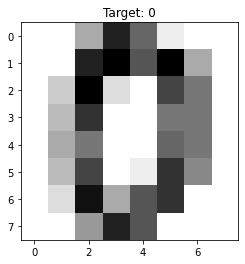

In [11]:
# Import tensorflow/sklearn modules.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Import other modules.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import choice

# Load & split the data.
dataset = load_digits()
data = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target)

# Show what a sample looks like.
image_sample = data[0].reshape(8, 8)

plt.imshow(image_sample, cmap='binary')
plt.title(f'Target: {target[0]}')

# Change target variables for neural network.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Scale the data.
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train.shape {X_train.shape}')
print(f'y_train.shape {y_train.shape}')
print(f'X_test.shape {X_test.shape}')
print(f'y_test.shape {y_test.shape}')


#### Create Model

In [12]:
def model():
    
    model = Sequential()
    model.add(Dense(50, input_shape=(64,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))    # Output layer, units must be the same as len(np.unique(target))
    
    # Compiling the model with the nadam optimizer (variation of adam)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model()

# Create random seed for repeatable results.
tf.random.set_seed(42)

# Fit the model.
results = (
    model.fit(
        X_train, y_train,
        validation_split=0.75,
        epochs=25,
        batch_size=8,
        verbose=False)
    ).history

# NOTE: batch_size & epoch parameters are crucial for prevention of overfitting

# Print the results.
print(
    'Train Score: {:.2f}%'.format(results['accuracy'][-1]*100),
    'Validation Score: {:.2f}%'.format(results['val_accuracy'][-1]*100),
    'Test Score: {:.2f}%'.format(model.evaluate(X_test, y_test, verbose=False)[1]*100),
    sep='\n')


Train Score: 100.00%
Validation Score: 92.78%
Test Score: 92.44%


#### Visualize the results

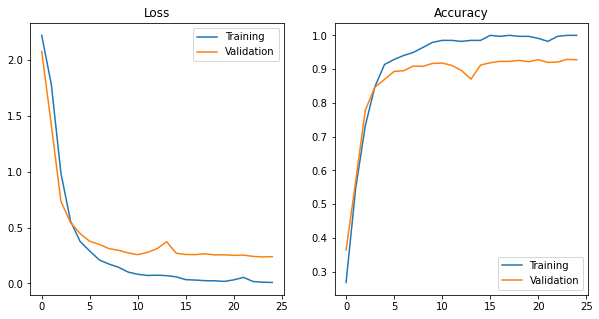

In [13]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10, 5))

ax_1.plot(range(25), results['loss'], label='Training')
ax_1.plot(range(25), results['val_loss'], label='Validation')
ax_1.set_title('Loss')
ax_1.legend()

ax_2.plot(range(25), results['accuracy'], label='Training')
ax_2.plot(range(25), results['val_accuracy'], label='Validation')
ax_2.set_title('Accuracy')
ax_2.legend()


#### Test the model on random samples.

Prediction: 5


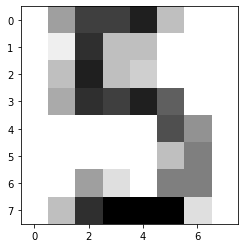

In [18]:
sample = np.array(choice(X_test)).reshape(1, -1)
prediction = np.argmax(model.predict(sample))

plt.imshow(sample.reshape(8, 8), cmap='binary')
print(f'Prediction: {prediction}')